In [26]:
import pandas as pd
import matplotlib.pyplot as plt
#OBs.: Editei um pouco o cabeçario do documento para economizar algumas funções

In [27]:
ocorrencias2011 = pd.DataFrame(pd.read_csv('./data/2011.csv', delimiter=';'))#carregando os documentos
ocorrencias2012 = pd.DataFrame(pd.read_csv('./data/2012.csv', delimiter=';'))
ocorrencias2013 = pd.DataFrame(pd.read_csv('./data/2013.csv', delimiter=';'))
ocorrencias2014 = pd.DataFrame(pd.read_csv('./data/2014.csv', delimiter=';'))
ocorrencias2015 = pd.DataFrame(pd.read_csv('./data/2015.csv', delimiter=';'))
ocorrencias2016 = pd.DataFrame(pd.read_csv('./data/2016.csv', delimiter=';'))
ocorrencias = pd.concat([ocorrencias2011, ocorrencias2012, ocorrencias2013, ocorrencias2014, ocorrencias2015, 
                         ocorrencias2016])
ocorrencias.Data = pd.to_datetime(ocorrencias.Data)#tranformando o campo Data(mes e ano) de string para tipo date
ocorrencias['Ano'] = ocorrencias['Data'].dt.year #extraindo o ano e criando uma nova coluna com o ano
ocorrencias = ocorrencias.drop(['UF', 'Data'], axis=1)#excluindo colunas
#UF(UF por extenso) mesmo dado da coluna 'Sigla UF'
#Data: uma vez criada a coluna Ano, esta não tem nada a acrescentar

<p>nota inicial.: a base de dados fornecida pela SINESPJC apenas contem informações sobre seis(6) tipos de ocorrencia, sendo eles: Estupro, furto de veículo, roubo de veículo, homicídio doloso, lesão corporal seguida de morte, e roubo seguido de morte (latrocínio). Assim sendo todos os indicadores abaixo apenas abordam estes tipos de ocorrencia. Link para as bases de dados originais: http://dados.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica</p>

<h1>Questões</h1>
<h3>1) Existe relação entre tipos de ocorrência?</h3>

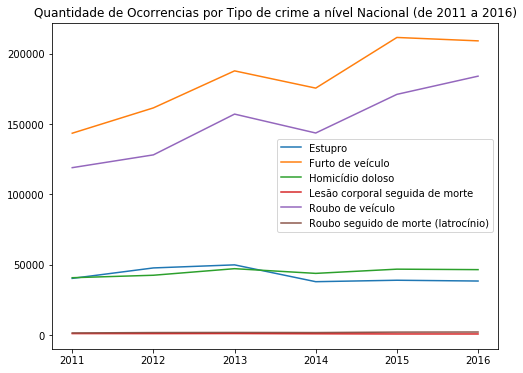

In [28]:
tipos = ocorrencias.Crime.unique()
for tipo in tipos:
    match = ocorrencias['Crime'] == tipo
    dadosPorTipo = ocorrencias[match]
    plt.plot(dadosPorTipo.Ano.unique(), dadosPorTipo.groupby('Ano').sum().Quantidade, label = tipo)
plt.title('Quantidade de Ocorrencias por Tipo de crime a nível Nacional (de 2011 a 2016)')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.show()

<p>R.: Existe calaramente uma relação entre roubo e furto de veículo, as demais parecem não apresentar relação.</p>

<h3>2) Que tipo de ocorrencia ocorre com maior frequencia a cada mês?</h3>

<p>R.: Segundo o gráfico acima é Furto de veículo</p>

<h3>3) Quais os tipo de ocorrência mais comuns por UF?</h3>

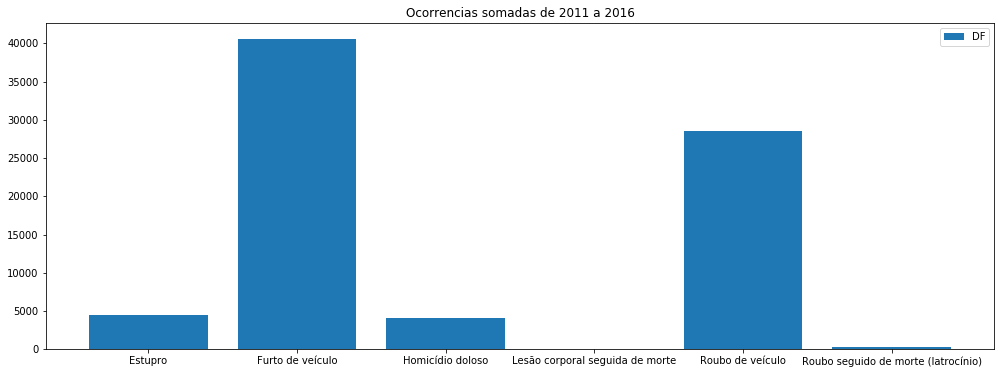

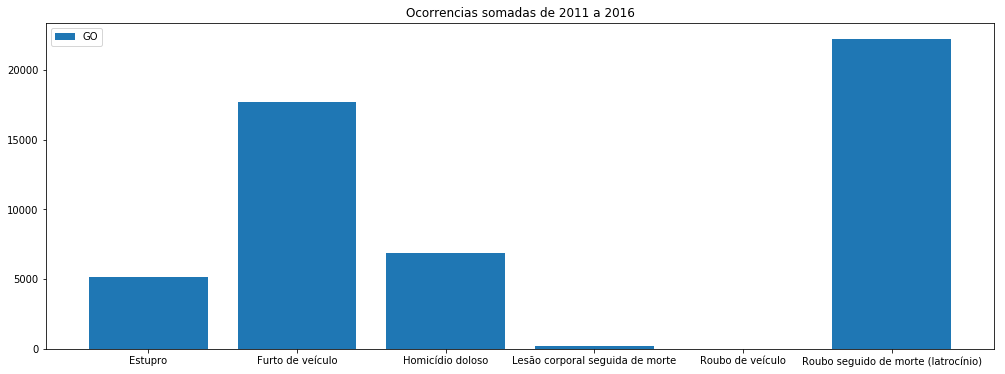

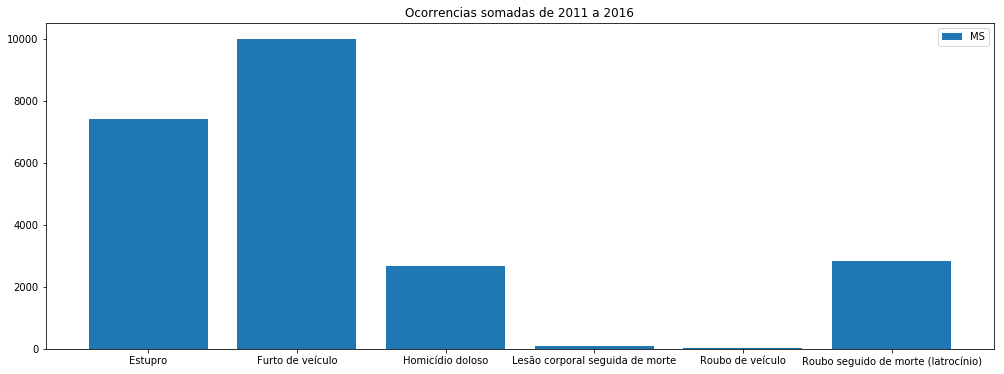

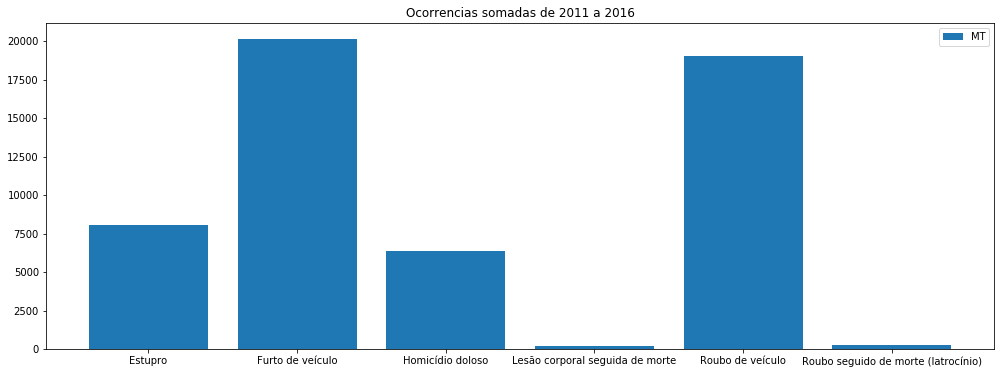

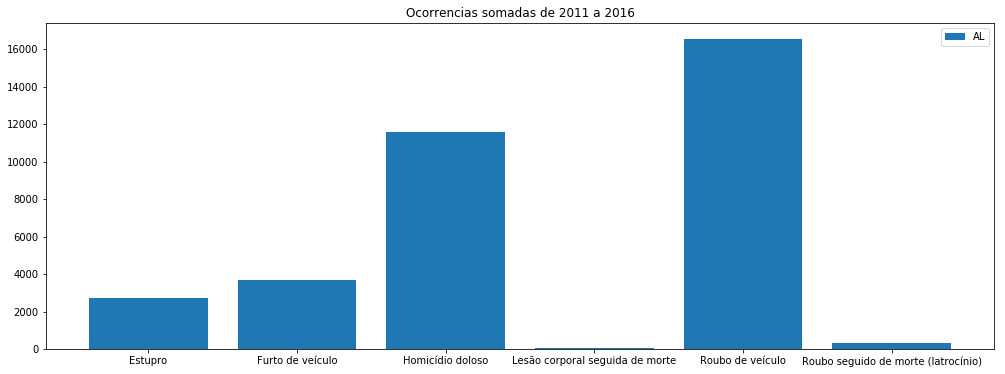

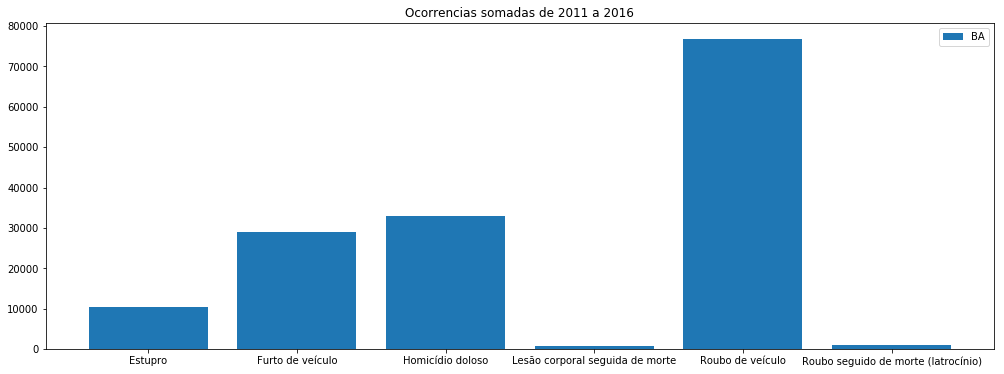

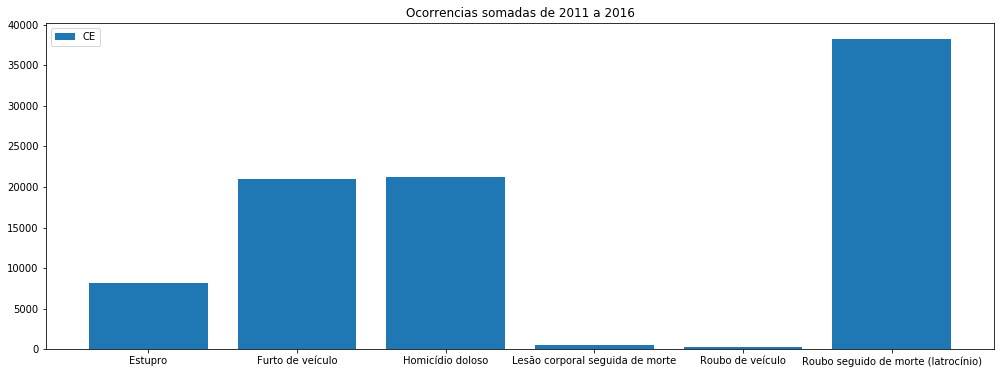

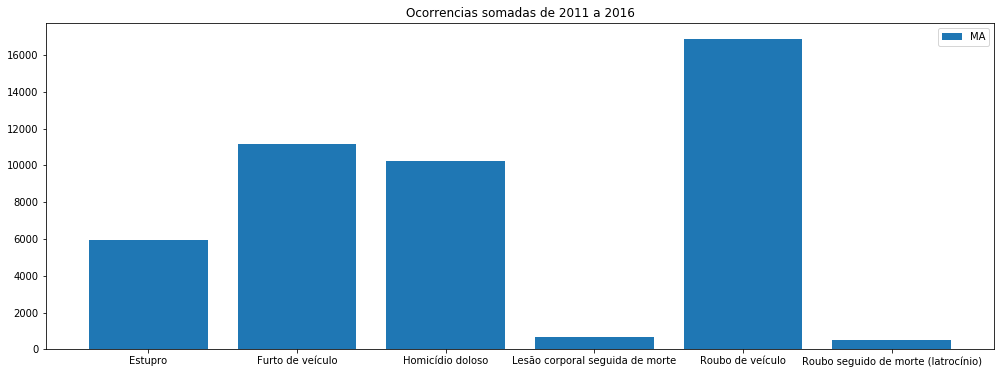

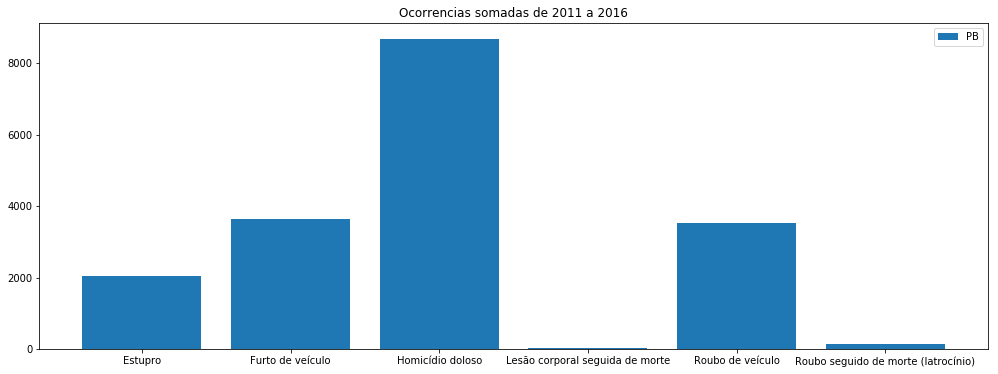

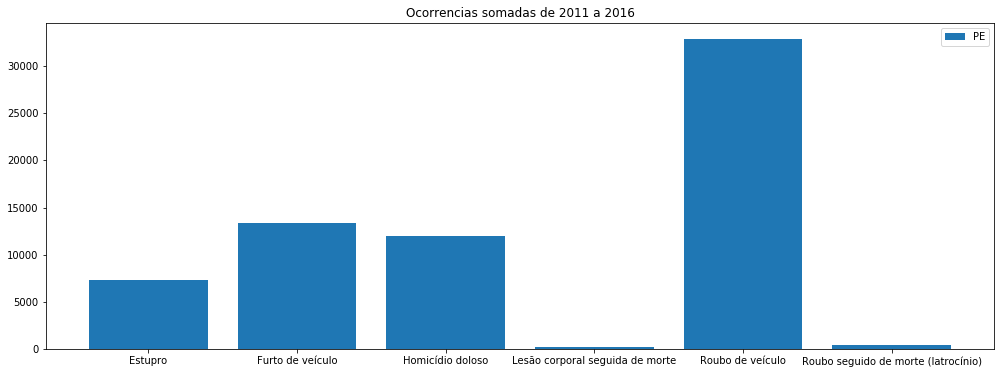

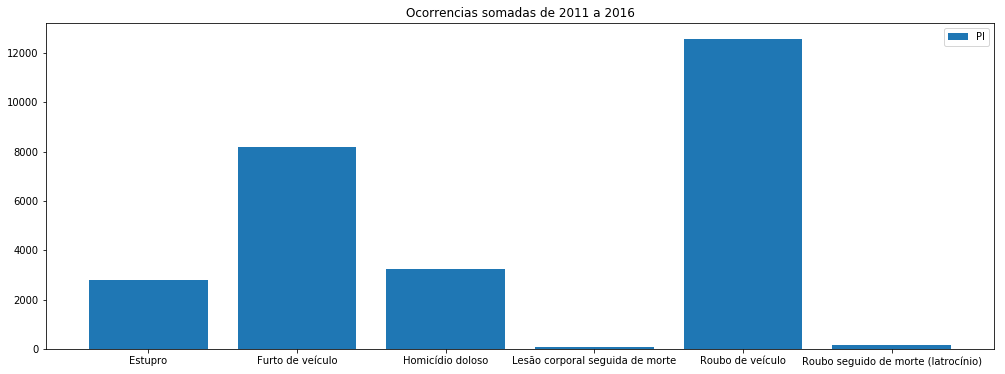

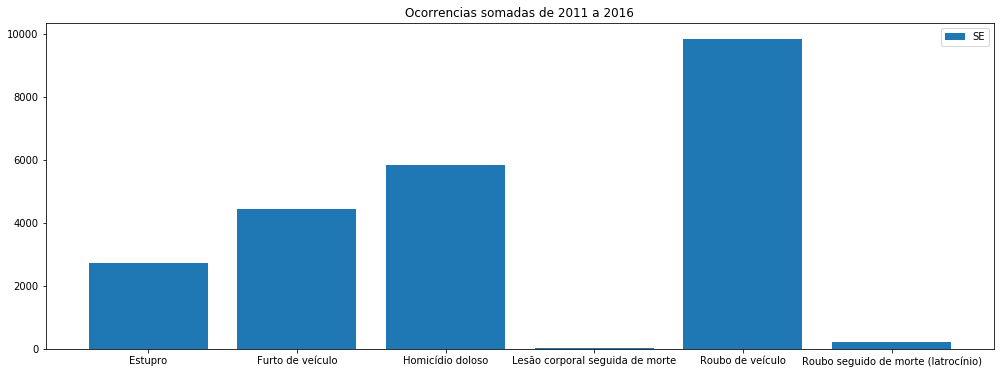

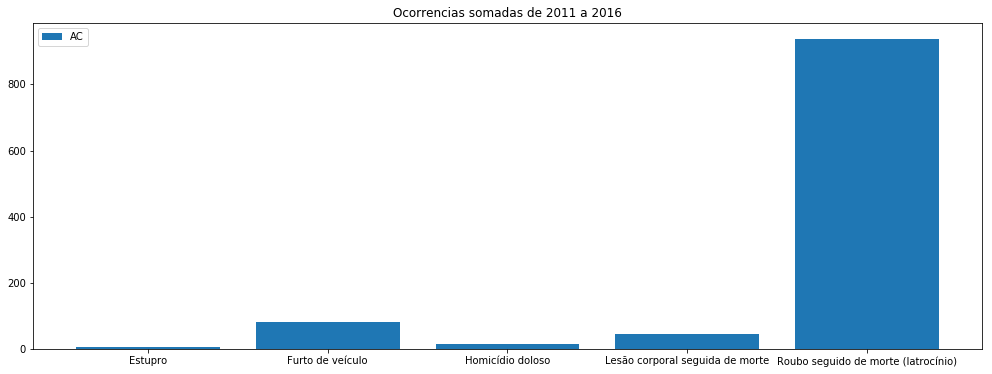

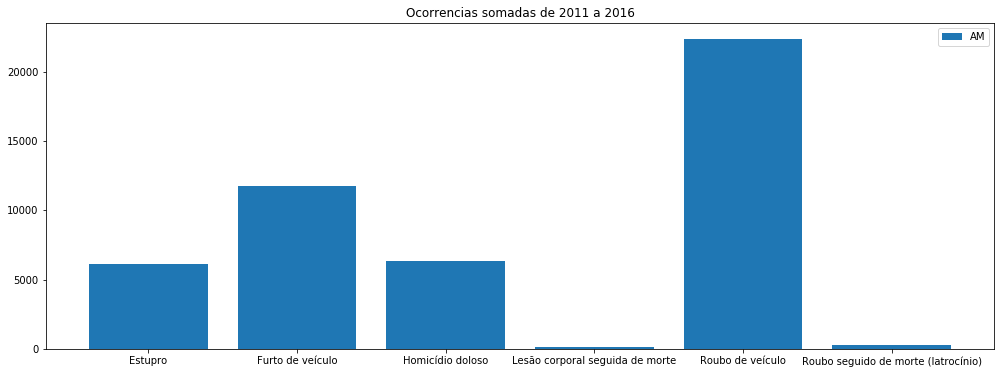

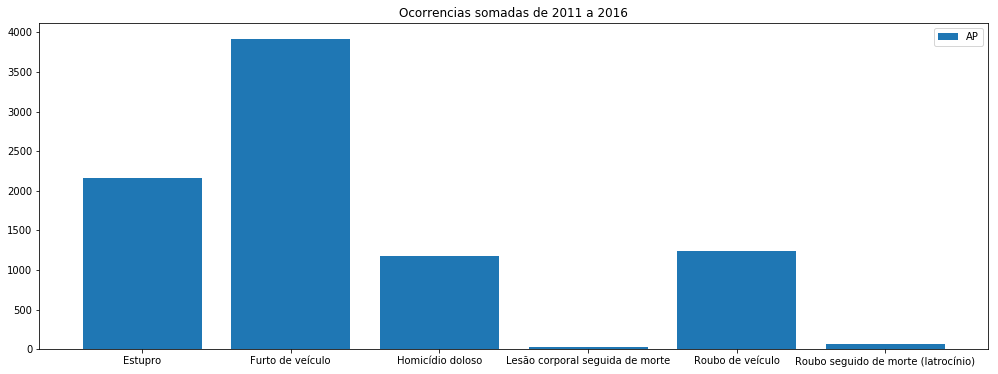

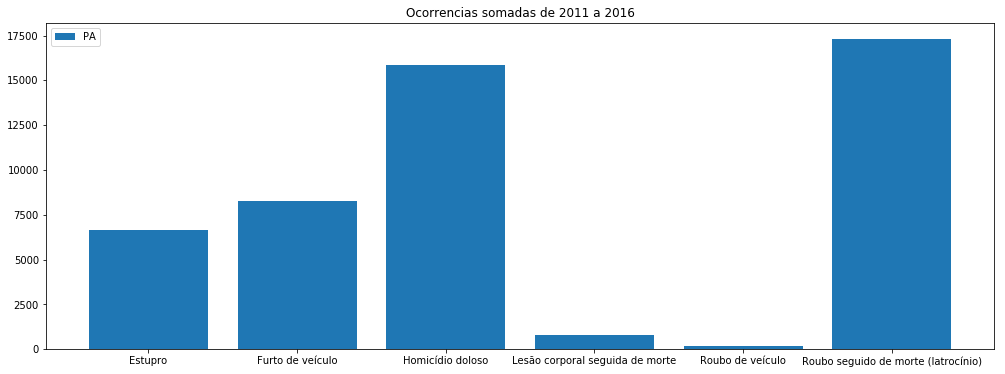

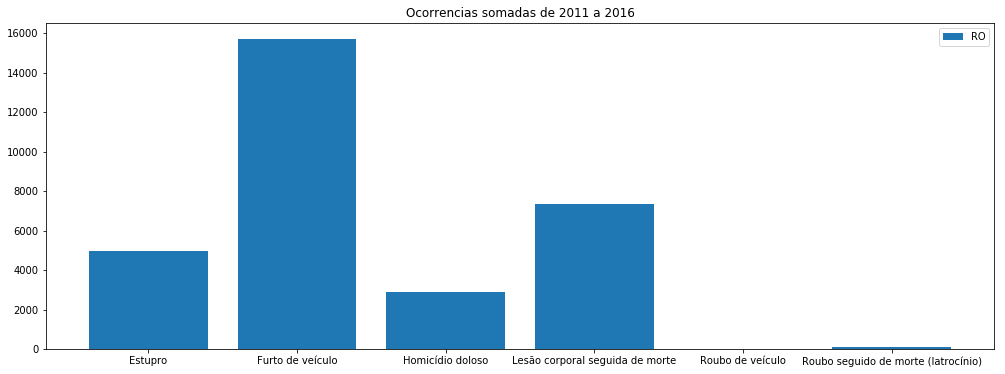

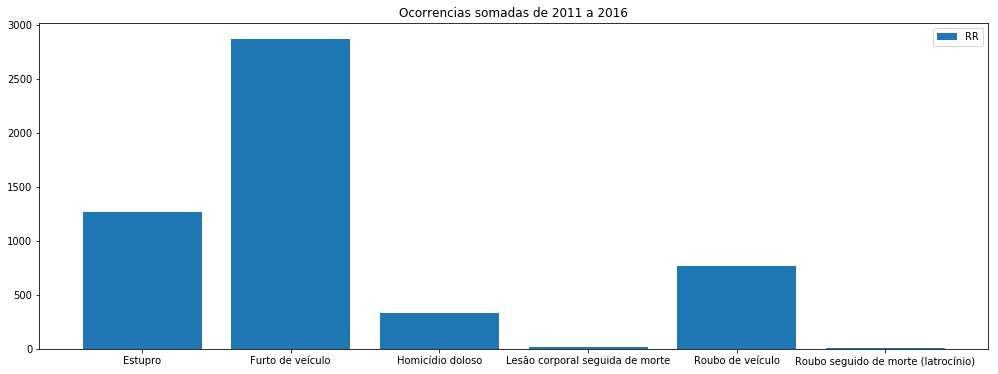

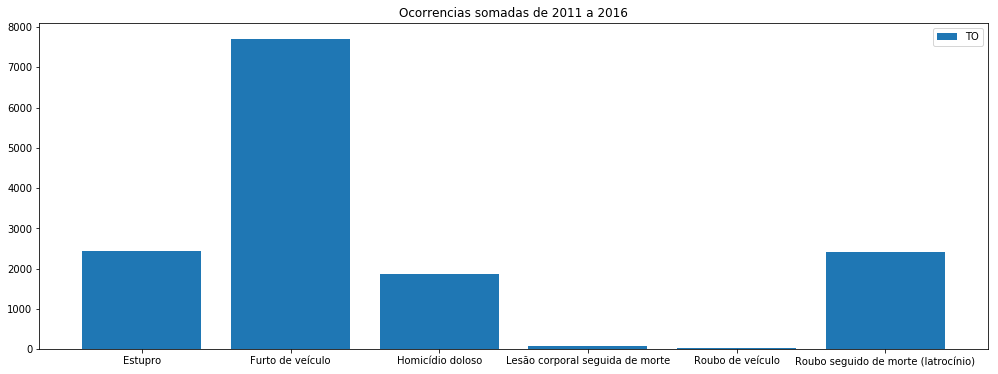

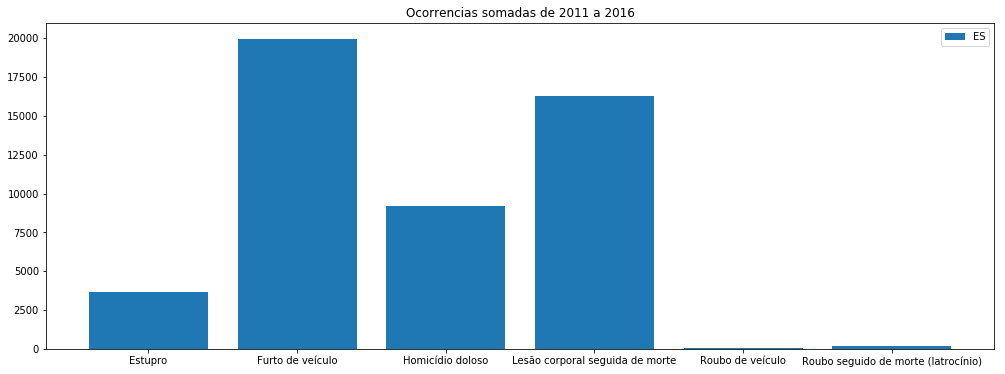

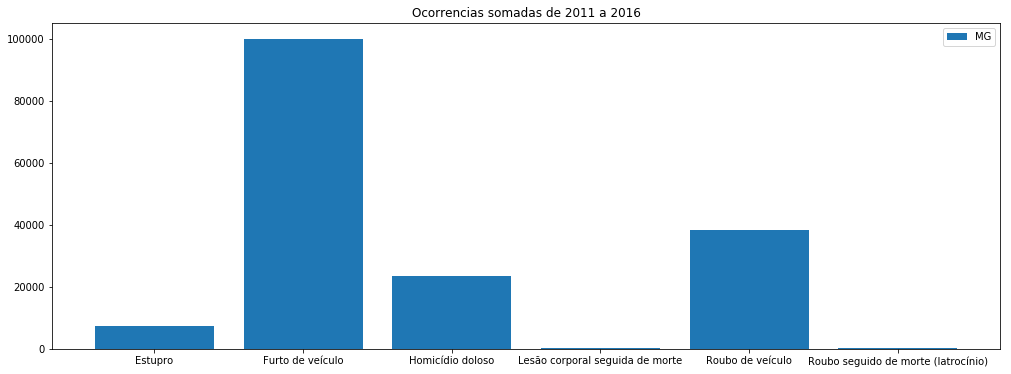

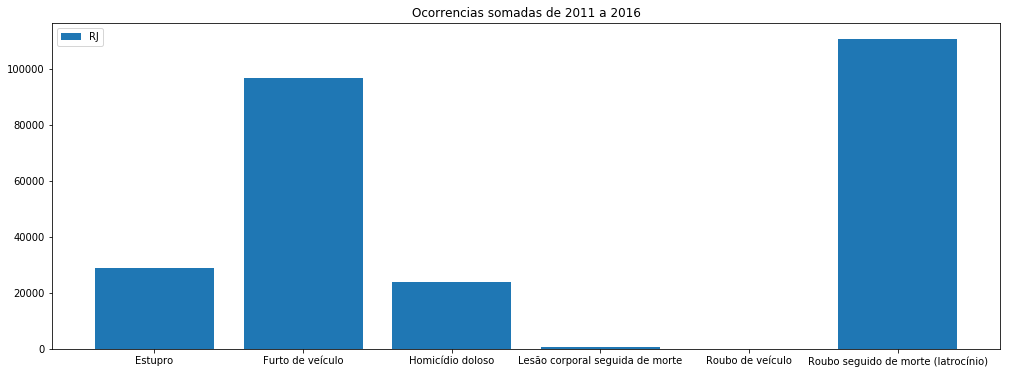

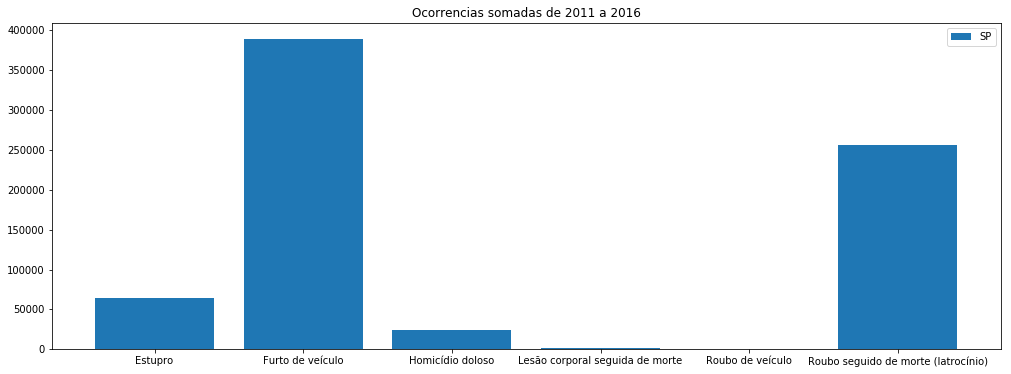

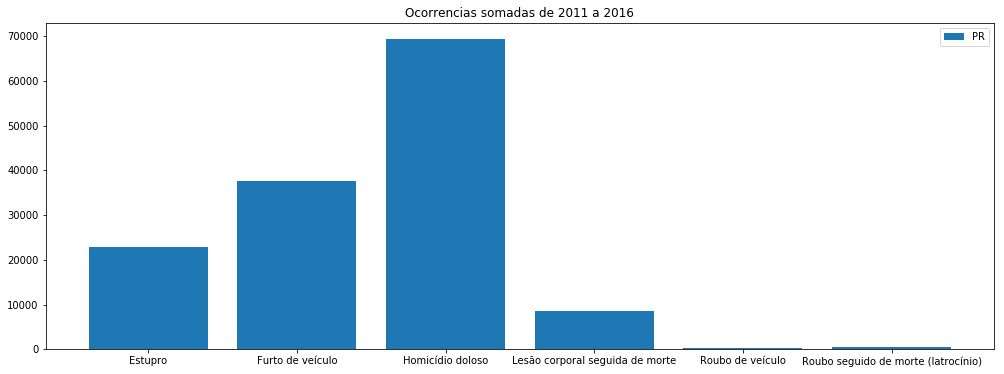

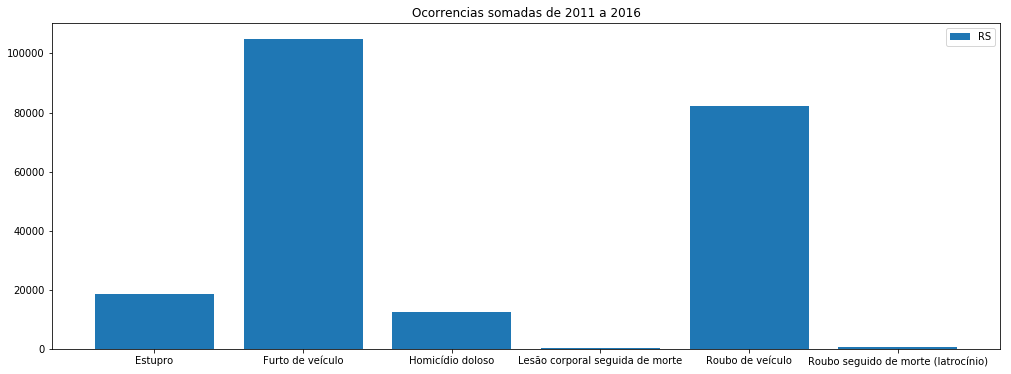

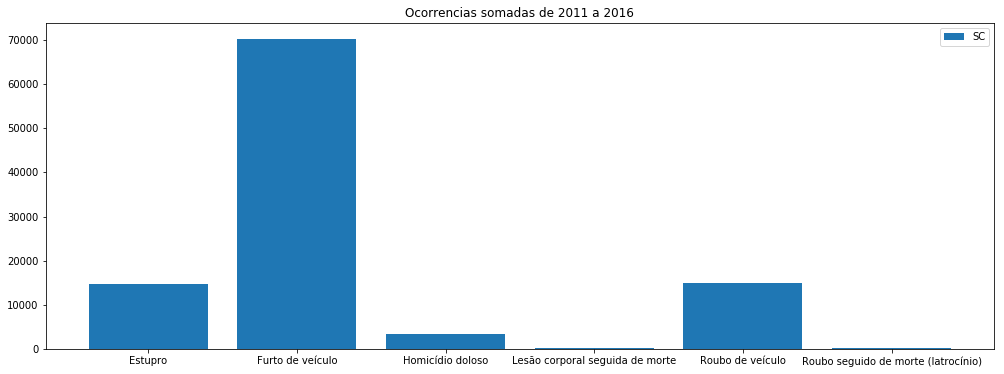

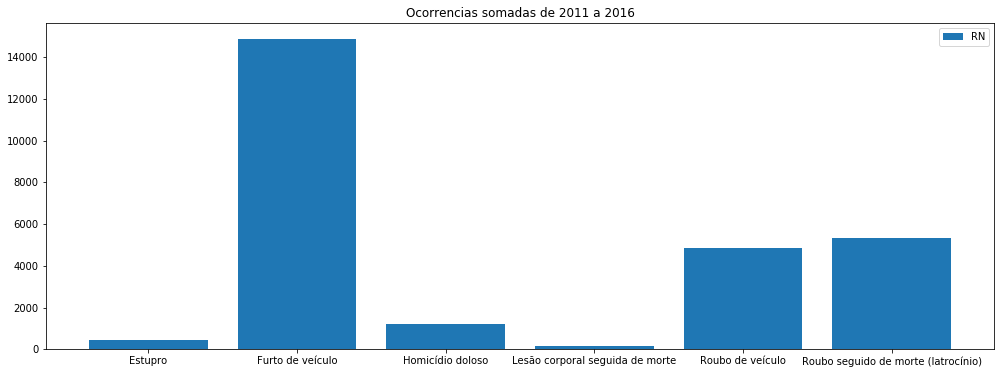

In [30]:
tipos = ocorrencias.SiglaUF.unique()
for tipo in tipos:
    match = ocorrencias['SiglaUF'] == tipo
    dadosPorTipo = ocorrencias[match]
    plt.bar(dadosPorTipo.Crime.unique(), dadosPorTipo.groupby('Crime').sum().Quantidade, label = tipo)
    plt.title('Ocorrencias somadas de 2011 a 2016')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size
    plt.legend()
    plt.show()

<h3>4) Como foi a progressão das ocorrencias de 2011 a 2016 no Brasil?</h3> 

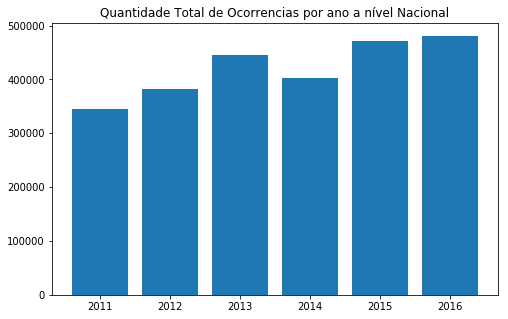

In [84]:
plt.bar(ocorrencias.Ano.unique(), ocorrencias.groupby('Ano').sum().Quantidade)
plt.title("Quantidade Total de Ocorrencias por ano a nível Nacional")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.show()

<h3>5) Como esta distribuida a quantidade de ocorrencias por mês de 2011 a 2016?</h3> 

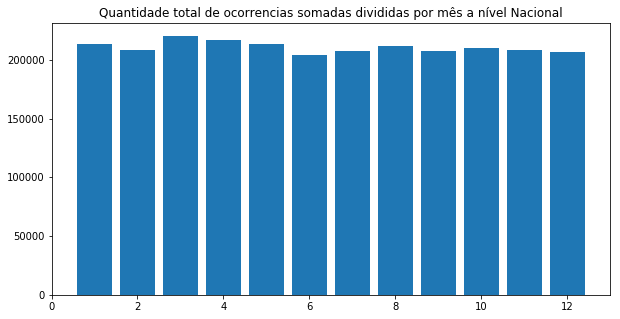

In [87]:
plt.bar(ocorrencias.Mês.unique(), ocorrencias.groupby('Mês').sum().Quantidade)
plt.title("Quantidade total de ocorrencias somadas divididas por mês a nível Nacional")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.show()

<h3>6) Como esta distribuida as ocorrencias por região de 2011 a 2016?</h3> 

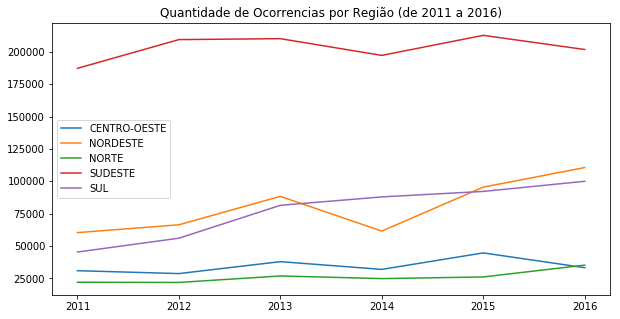

In [65]:
tipos = ocorrencias.Região.unique()
for tipo in tipos:
    match = ocorrencias['Região'] == tipo
    dadosPorTipo = ocorrencias[match]
    plt.plot(dadosPorTipo.Ano.unique(), dadosPorTipo.groupby('Ano').sum().Quantidade, label = tipo)
plt.title('Quantidade de Ocorrencias por Região (de 2011 a 2016)')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.show()

<h3>7) Como esta distribuida as ocorrencias no Nordeste de 2011 a 2016?</h3> 

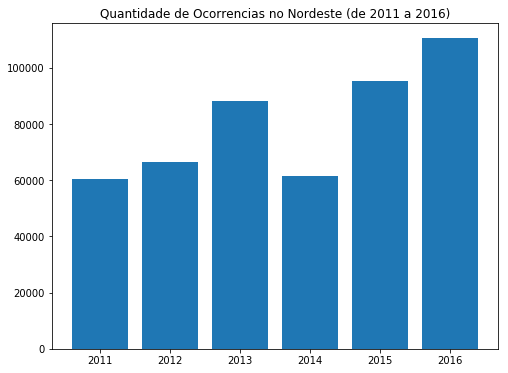

In [66]:
nordeste = ocorrencias[ocorrencias['Região'] == 'NORDESTE']
plt.bar(nordeste.Ano.unique(), nordeste.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias no Nordeste (de 2011 a 2016)')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.show()

<h3>8) Como esta distribuida as ocorrencias no Rio Grande do Norte de 2012 a 2016?</h3> 

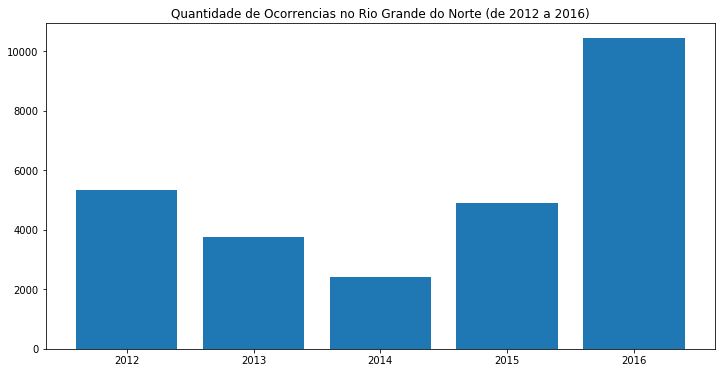

In [67]:
match = ocorrencias['SiglaUF'] == 'RN'
dadosPorTipo = ocorrencias[match]
plt.bar(dadosPorTipo.Ano.unique(), dadosPorTipo.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias no Rio Grande do Norte (de 2012 a 2016)')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.show()

<h3>9) Como esta distribuida as ocorrencias em cidades com campus da UFERSA de 2012 a 2016?</h3> 

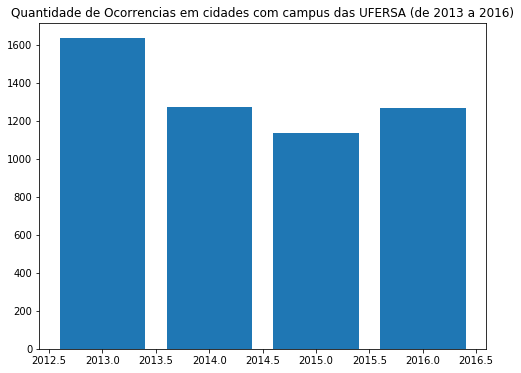

In [81]:
# angicos cod: 2400802
# caraubas cod: 2402303
# pau dos ferros cod: 2409407
# mossoro cod: 2408003
angicos = ocorrencias[ocorrencias['CódigoIBGE'] == 2400802]
caraubas = ocorrencias[ocorrencias['CódigoIBGE'] == 2402303]
pauDosFerros = ocorrencias[ocorrencias['CódigoIBGE'] == 2409407]
mossoro = ocorrencias[ocorrencias['CódigoIBGE'] == 2408003]
df = pd.concat([angicos, caraubas, pauDosFerros, mossoro])
plt.bar(df.Ano.unique(), df.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias em cidades com campus das UFERSA (de 2013 a 2016)')
plt.show()

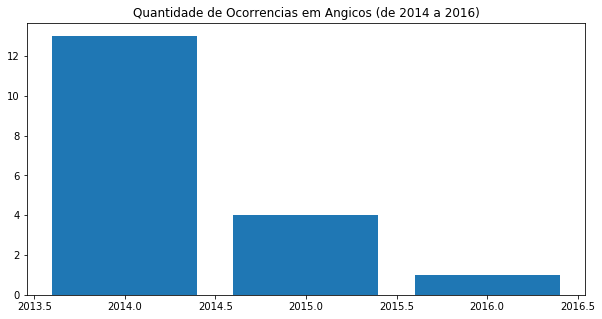

In [93]:
# angicos cod: 2400802
angicos = ocorrencias[ocorrencias['CódigoIBGE'] == 2400802]
plt.bar(angicos.Ano.unique(), angicos.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias em Angicos (de 2014 a 2016)')
plt.show()

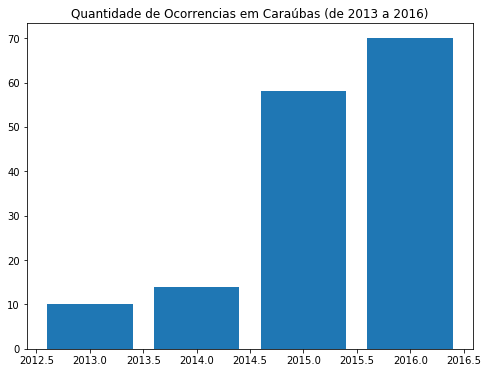

In [77]:
# caraubas cod: 2402303
caraubas = ocorrencias[ocorrencias['CódigoIBGE'] == 2402303]
plt.bar(caraubas.Ano.unique(), caraubas.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias em Caraúbas (de 2013 a 2016)')
plt.show()

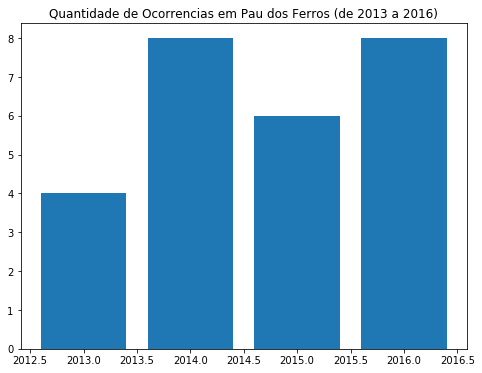

In [76]:
# pau dos ferros cod: 2409407
pauDosFerros = ocorrencias[ocorrencias['CódigoIBGE'] == 2409407]
plt.bar(pauDosFerros.Ano.unique(), pauDosFerros.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias em Pau dos Ferros (de 2013 a 2016)')
plt.show()

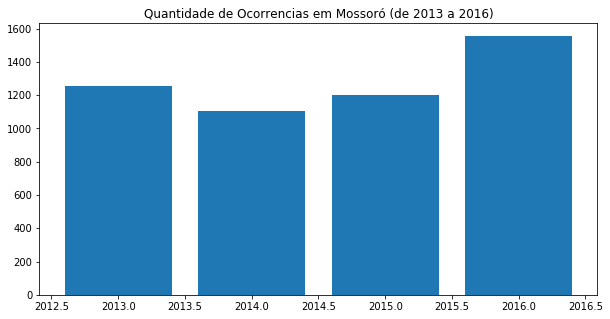

In [91]:
# mossoro cod: 2408003
mossoro = ocorrencias[ocorrencias['CódigoIBGE'] == 2408003]
plt.bar(mossoro.Ano.unique(), mossoro.groupby('Ano').sum().Quantidade)
plt.title('Quantidade de Ocorrencias em Mossoró (de 2013 a 2016)')
plt.show()